<a href="https://colab.research.google.com/github/manvir720s/financeoptomization/blob/main/Finance_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#description: this program optimizes a users portfolio using efficient frontier


In [ ]:
from pandas_datareader import data as web
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
assets = ['SPY', 'AAPL', 'VIX', 'AMZN', 'TSLA']

In [ ]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #weights per stock 

In [ ]:
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-05-24'

In [ ]:
#create df to store adj close price of stocks 
df = pd.DataFrame()

#store adj close price into df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source= 'yahoo', start ='2013-01-01', end = today)['Adj Close']

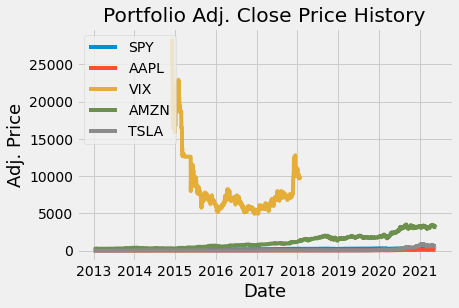

In [ ]:
my_stocks = df

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title('Portfolio Adj. Close Price History')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price', fontsize =18)
plt.legend(my_stocks.columns.values, loc ='upper left')

In [ ]:
returns =df.pct_change()

In [ ]:
cov_matrix_annual = returns.cov() *252

In [ ]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))

In [ ]:
port_volatility = np.sqrt(port_variance)

In [ ]:
portfolioSimpleAnnualReturn = np.sum(returns.mean() *weights) *252


In [ ]:
#finding risk/volatility
percent_var= str( round(port_variance, 2)*100) + '%'
percent_vols = str(round(port_volatility, 2)*100) +'%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100) +'%'

print ('Expected annual return: ' + percent_ret)
print ('Annual Volatility/Risk: ' + percent_vols)
print ('Annual Variance: ' + percent_var)
#values based on the weights 

Expected annual return: 28.000000000000004%
Annual Volatility/Risk: 22.0%
Annual Variance: 5.0%


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 1.3MB 15.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.12-cp37-cp37m-linux_x86_64.whl size=2731600 sha256=47534ee4ffe0530da4679138e684f00a228e369850aa7b91a167fe2539e05774
  Stored in directory: /root/.cache/pip/wheels/9b/62/55/1da181c05c710c5d99bd560edebec3bd6a61cb69acef9dc00e
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
#calculate the expected returns and annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio, compares return to risk, rewards/risk,
# higher sharpe means lower risk and higher returns. low shapre could mean higher risk and lower rewards 
# basically can determine whether smart decisions (high) or pure luck (lower)
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print (cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('SPY', 0.0), ('AAPL', 0.20675), ('VIX', 0.0), ('AMZN', 0.46476), ('TSLA', 0.32849)])
Expected annual return: 44.6%
Annual volatility: 30.1%
Sharpe Ratio: 1.41


(0.44642706228468887, 0.3013928068646825, 1.4148548093124977)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 10000)
allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete Allocation:  {'AAPL': 17, 'AMZN': 1, 'TSLA': 6}
Funds remaining: $1179.33
